In [236]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get all titled palyers' usernames

In [9]:
titles = np.array(['GM', 'WGM', 'IM', 'WIM', 'FM', 'WFM', 'NM', 'WNM', 'CM', 'WCM'])

In [25]:
titled_players_dict = {}

In [26]:
for t in titles:
    url = 'https://api.chess.com/pub/titled/' + t
    r = requests.get(url)
    json_data = r.json()
    titled_players_dict[t] = json_data['players']

In [139]:
titled_players_dict.keys()

dict_keys(['GM', 'WGM', 'IM', 'WIM', 'FM', 'WFM', 'NM', 'WNM', 'CM', 'WCM'])

## Create a chess data frame

In [68]:
chess = pd.melt(titled_players_df)
chess = chess.dropna()
chess.columns = ['title','username']

### Barplot for counts of all titled players

In [ ]:
titled_players_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in titled_players_dict.items() ]))

In [125]:
h = chess['title'].value_counts()
h=h.reset_index()

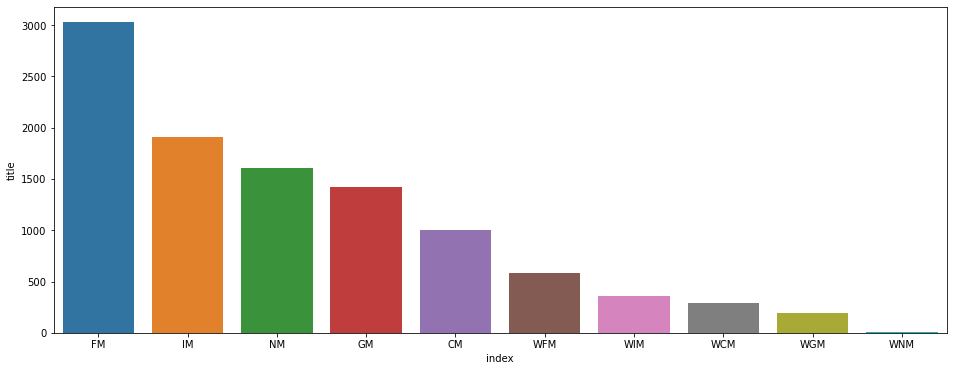

In [541]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.barplot(x='index',y='title',data=h)
#plt.savefig('Num_players_by_title.jpg',dpi=300)

## Get titled palyers ratings in rapid and blitz

In [207]:
user_name = np.array(chess['username'])
rapid_rating = []
blitz_rating = []
n = 0
rows_n = chess.shape[0]


In [208]:
for un in user_name:
    n += 1
    if n % 100 == 0:
        print(n,'out of',rows_n,round((n/rows_n)*100,2),'% done')
    url = 'https://api.chess.com/pub/player/' + un + '/stats'
    r = requests.get(url)
    json_data = r.json()
    if 'chess_rapid' in json_data.keys():
        rapid_rating.append(json_data['chess_rapid']['last']['rating'])
    else:
        rapid_rating.append(0)
        
    if 'chess_blitz' in json_data.keys():
        blitz_rating.append(json_data['chess_blitz']['last']['rating'])
    else:
        blitz_rating.append(0)

100 out of 10410 0.96 % done
200 out of 10410 1.92 % done
300 out of 10410 2.88 % done
400 out of 10410 3.84 % done
500 out of 10410 4.8 % done
600 out of 10410 5.76 % done
700 out of 10410 6.72 % done
800 out of 10410 7.68 % done
900 out of 10410 8.65 % done
1000 out of 10410 9.61 % done
1100 out of 10410 10.57 % done
1200 out of 10410 11.53 % done
1300 out of 10410 12.49 % done
1400 out of 10410 13.45 % done
1500 out of 10410 14.41 % done
1600 out of 10410 15.37 % done
1700 out of 10410 16.33 % done
1800 out of 10410 17.29 % done
1900 out of 10410 18.25 % done
2000 out of 10410 19.21 % done
2100 out of 10410 20.17 % done
2200 out of 10410 21.13 % done
2300 out of 10410 22.09 % done
2400 out of 10410 23.05 % done
2500 out of 10410 24.02 % done
2600 out of 10410 24.98 % done
2700 out of 10410 25.94 % done
2800 out of 10410 26.9 % done
2900 out of 10410 27.86 % done
3000 out of 10410 28.82 % done
3100 out of 10410 29.78 % done
3200 out of 10410 30.74 % done
3300 out of 10410 31.7 % done

In [ ]:
chess['rapid_rating'] = rapid_rating
chess['blitz_rating'] = blitz_rating

## Save chess data

In [227]:
chess.to_pickle("chess.pkl")

In [261]:
#chess = pd.read_pickle("chess.pkl")

### Replace 0 with NaN and plot ratings

In [223]:
chess['rapid_rating'] = chess['rapid_rating'].replace(0,np.nan)
chess['blitz_rating'] = chess['blitz_rating'].replace(0,np.nan)

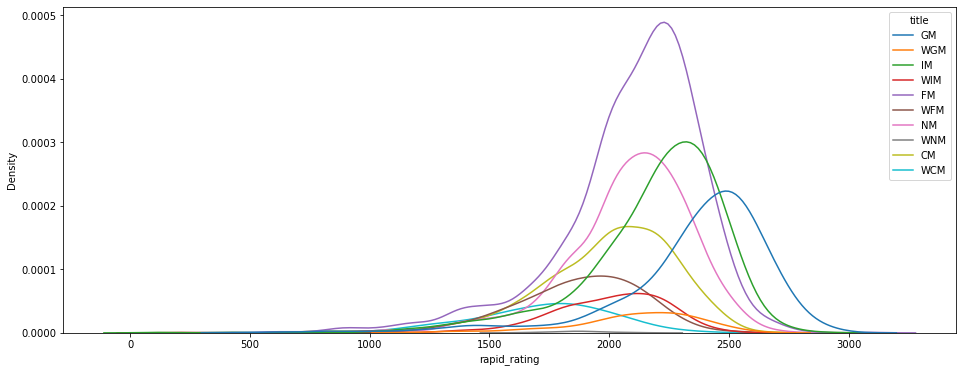

In [542]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.kdeplot(x='rapid_rating',data=chess,hue="title")
#plt.savefig('Rapid_rating_dist_by_title.jpg',dpi=300)

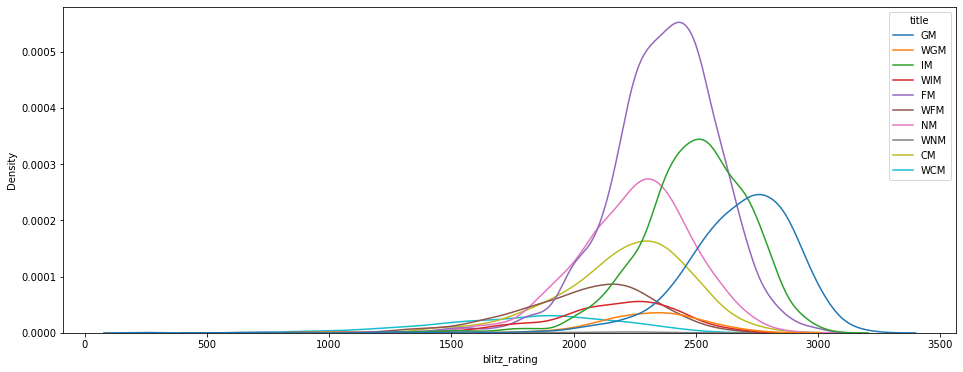

In [543]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.kdeplot(x='blitz_rating',data=chess,hue="title")
#plt.savefig('Blitz_rating_dist_by_title.jpg',dpi=300)

## Select only strong players and save data set

In [258]:
chess_strong = chess[(chess['rapid_rating']>2300) | (chess['blitz_rating']>2400)]

In [262]:
chess_strong.to_pickle("chess_strong.pkl")

In [263]:
chess_strong.shape

(5144, 4)

In [274]:
chess_strong

,title,username,rapid_rating,blitz_rating
0,GM,123lt,2505.0,2704.0
1,GM,124chess,2244.0,2646.0
2,GM,1977ivan,2342.0,2731.0
3,GM,1stsecond,2496.0,2785.0
5,GM,64aramis64,2497.0,2957.0
...,...,...,...,...
27443,WCM,not_najdorfs_player,2355.0,2420.0
27466,WCM,queen_2007,2413.0,2128.0
27497,WCM,speshka,1900.0,2421.0
27508,WCM,tidyclam,2246.0,2554.0


## Find out when strong players play their games

In [277]:
chess_strong[chess_strong['rapid_rating']==chess_strong['rapid_rating'].max()]

,title,username,rapid_rating,blitz_rating
15014,FM,white_ghost,3087.0,3001.0


In [293]:
usernames_s = np.array(chess_strong['username'])
usernames_s

array(['123lt', '124chess', '1977ivan', ..., 'speshka', 'tidyclam',
       'viuvanegra'], dtype=object)

In [309]:
n = 0
time_rapid = []
time_blitz = []
username_rapid = []
username_blitz = []

In [310]:
for un in usernames_s:
    n += 1
    if n % 100 == 0:
        print(n,'out of',len(usernames_s),round((n/len(usernames_s))*100,2),'% done')
    url = 'https://api.chess.com/pub/player/' + un + '/games/2022/04'
    r = requests.get(url)
    json_data = r.json()
    
    if len(json_data['games']) > 0:
        
        for game in range(len(json_data['games'])):
            
            if (json_data['games'][game]['rules'] == 'chess') & (json_data['games'][game]['time_class'] == 'rapid'):
                time_rapid.append(json_data['games'][game]['end_time'])
                username_rapid.append(un)
                
            if (json_data['games'][game]['rules'] == 'chess') & (json_data['games'][game]['time_class'] == 'blitz'):
                time_blitz.append(json_data['games'][game]['end_time'])
                username_blitz.append(un)

100 out of 5144 1.94 % done
200 out of 5144 3.89 % done
300 out of 5144 5.83 % done
400 out of 5144 7.78 % done
500 out of 5144 9.72 % done
600 out of 5144 11.66 % done
700 out of 5144 13.61 % done
800 out of 5144 15.55 % done
900 out of 5144 17.5 % done
1000 out of 5144 19.44 % done
1100 out of 5144 21.38 % done
1200 out of 5144 23.33 % done
1300 out of 5144 25.27 % done
1400 out of 5144 27.22 % done
1500 out of 5144 29.16 % done
1600 out of 5144 31.1 % done
1700 out of 5144 33.05 % done
1800 out of 5144 34.99 % done
1900 out of 5144 36.94 % done
2000 out of 5144 38.88 % done
2100 out of 5144 40.82 % done
2200 out of 5144 42.77 % done
2300 out of 5144 44.71 % done
2400 out of 5144 46.66 % done
2500 out of 5144 48.6 % done
2600 out of 5144 50.54 % done
2700 out of 5144 52.49 % done
2800 out of 5144 54.43 % done
2900 out of 5144 56.38 % done
3000 out of 5144 58.32 % done
3100 out of 5144 60.26 % done
3200 out of 5144 62.21 % done
3300 out of 5144 64.15 % done
3400 out of 5144 66.1 % don

In [313]:
rapid_times = pd.DataFrame({'username':username_rapid,'end_time':time_rapid})
rapid_times

,username,end_time
0,aleksandrovaleksei,1650132714
1,aleksandrovaleksei,1650135337
2,aleksandrovaleksei,1650137918
3,aleksandrovaleksei,1650139259
4,amintabatabaei,1648916217
...,...,...
7163,zimmm36,1649684090
7164,zimmm36,1649685317
7165,zimmm36,1649686140
7166,zverevlev,1649794101


In [314]:
blitz_times = pd.DataFrame({'username':username_blitz,'end_time':time_blitz})
blitz_times

,username,end_time
0,1977ivan,1650032737
1,1977ivan,1650033046
2,1977ivan,1650033408
3,1977ivan,1650033786
4,1977ivan,1650034117
...,...,...
223269,speshka,1649176884
223270,speshka,1649177372
223271,speshka,1649178108
223272,viuvanegra,1649812839


### Save times data

In [315]:
rapid_times.to_pickle("rapid_times.pkl")
blitz_times.to_pickle("blitz_times.pkl")

In [342]:
print('The number players played at least one rapid game in April:',len(rapid_times['username'].unique()))
print('The number players played at least one blitz game in April:',len(blitz_times['username'].unique()))
print('Total number of rapid games in April:',rapid_times.shape[0])
print('Total number of blitz games in April:',blitz_times.shape[0])
print('Average number of rapid games per player:',round(rapid_times.shape[0]/len(rapid_times['username'].unique()),2))
print('Average number of blitz games per player:',round(blitz_times.shape[0]/len(blitz_times['username'].unique()),2))

The number players played at least one rapid game in April: 634
The number players played at least one blitz game in April: 2389
Total number of rapid games in April: 7168
Total number of blitz games in April: 223274
Average number of rapid games per player: 11.31
Average number of blitz games per player: 93.46


<AxesSubplot:xlabel='username', ylabel='Count'>

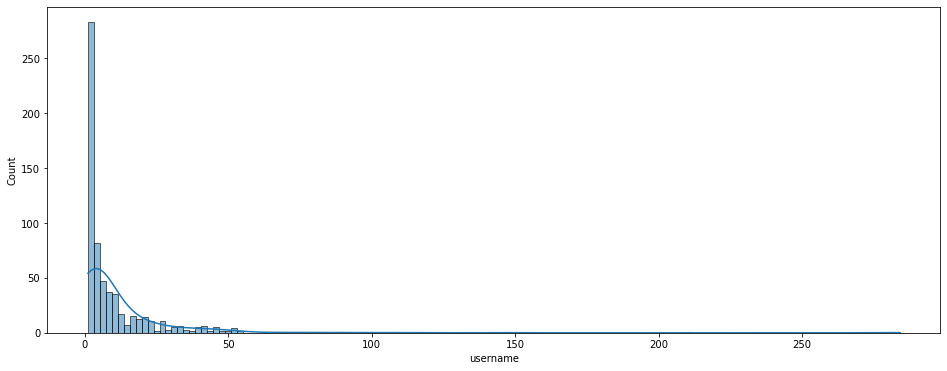

In [331]:
num_rapid_april = rapid_times['username'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(num_rapid_april,kde=True)

<AxesSubplot:xlabel='username', ylabel='Count'>

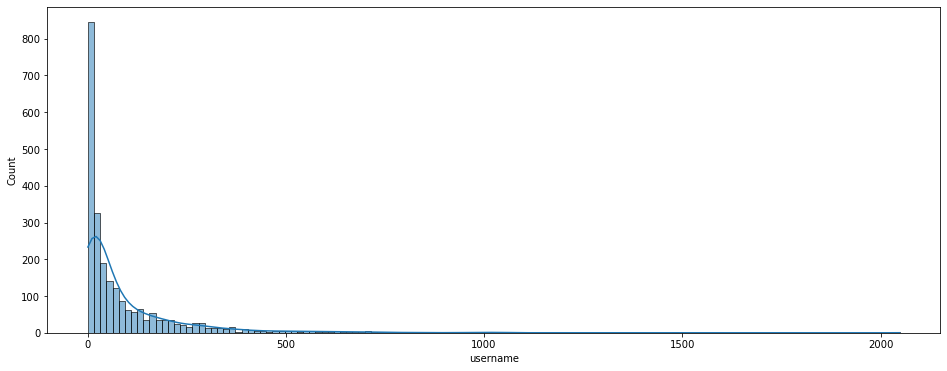

In [332]:
num_blitz_april = blitz_times['username'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(num_blitz_april,kde=True)

In [348]:
pd.to_datetime(1648994070, unit='s',utc=True)

Timestamp('2022-04-15 14:25:37+0000', tz='UTC')

In [372]:
rapid_times['end_time_r'] = pd.to_datetime(rapid_times['end_time'], unit='s',utc=True)
blitz_times['end_time_r'] = pd.to_datetime(blitz_times['end_time'], unit='s',utc=True)

In [373]:
rapid_times['end_time_r'] = rapid_times['end_time_r'].dt.tz_convert('Europe/Berlin')
blitz_times['end_time_r'] = blitz_times['end_time_r'].dt.tz_convert('Europe/Berlin')

In [385]:
rapid_times['weekday'] = rapid_times['end_time_r'].dt.weekday
blitz_times['weekday'] = blitz_times['end_time_r'].dt.weekday
rapid_times['hour'] = rapid_times['end_time_r'].dt.hour
blitz_times['hour'] = blitz_times['end_time_r'].dt.hour

In [386]:
blitz_times

,username,end_time,end_time_r,weekday,hour
0,1977ivan,1650032737,2022-04-15 16:25:37+02:00,4,16
1,1977ivan,1650033046,2022-04-15 16:30:46+02:00,4,16
2,1977ivan,1650033408,2022-04-15 16:36:48+02:00,4,16
3,1977ivan,1650033786,2022-04-15 16:43:06+02:00,4,16
4,1977ivan,1650034117,2022-04-15 16:48:37+02:00,4,16
...,...,...,...,...,...
223269,speshka,1649176884,2022-04-05 18:41:24+02:00,1,18
223270,speshka,1649177372,2022-04-05 18:49:32+02:00,1,18
223271,speshka,1649178108,2022-04-05 19:01:48+02:00,1,19
223272,viuvanegra,1649812839,2022-04-13 03:20:39+02:00,2,3


### Plots for times

In [504]:
rapid_hour = rapid_times[['hour']].value_counts()
rapid_hour = rapid_hour.reset_index()
rapid_hour.columns=['Hours of day','Number of games']

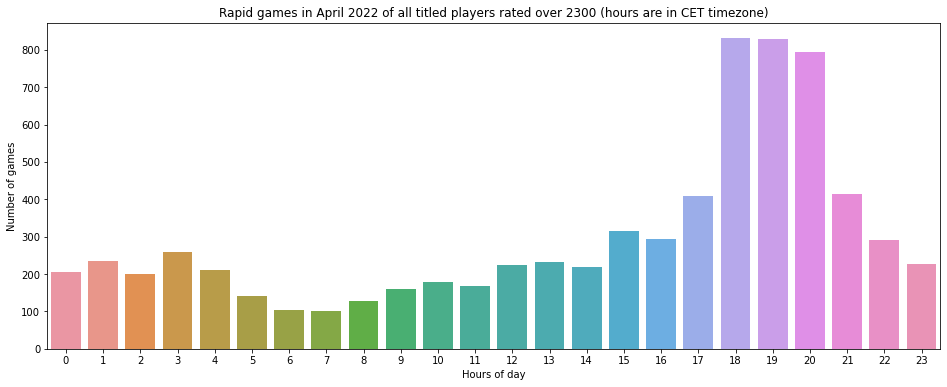

In [535]:
plt.figure(figsize=(16, 6))
sns.barplot(data=rapid_hour,x='Hours of day',y='Number of games')
plt.title('Rapid games in April 2022 of all titled players rated over 2300 (hours are in CET timezone)')
#plt.savefig('Hours_rapid.jpg',dpi=300)

In [498]:
def weekday_word(df,col):
    df[col] = df[col].astype(str)
    df[col] = df[col].map({'0':'Monday','1':'Tuesday','2':'Wednesday','3':'Thursday','4':'Friday','5':'Saturday','6':'Sunday'})
    return df

In [506]:
rapid_weekday = rapid_times[['weekday']].value_counts()
rapid_weekday = rapid_weekday.reset_index()
rapid_weekday.columns=['Weekday','Number of games']
weekday_word(rapid_weekday,'Weekday')

,Weekday,Number of games
0,Saturday,2448
1,Sunday,1130
2,Friday,890
3,Thursday,741
4,Tuesday,723
5,Wednesday,643
6,Monday,593


In [510]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

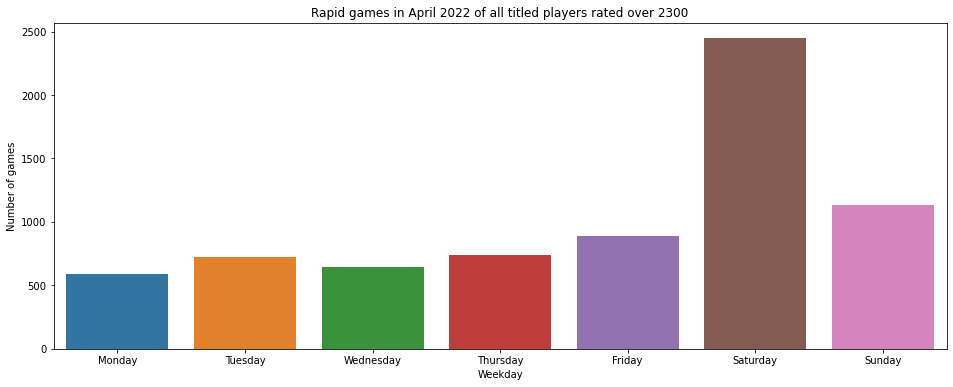

In [536]:
plt.figure(figsize=(16, 6))
sns.barplot(data=rapid_weekday,x='Weekday',y='Number of games',order=weekdays)
plt.title('Rapid games in April 2022 of all titled players rated over 2300')
#plt.savefig('Weekday_rapid.jpg',dpi=300)

In [515]:
rapid_hour_weekday = rapid_times[['weekday','hour']].value_counts()
rapid_hour_weekday = rapid_hour_weekday.reset_index()
rapid_hour_weekday.columns = ['Weekday','Hours of day','Number of games']
weekday_word(rapid_hour_weekday,'Weekday')

,Weekday,Hours of day,Number of games
0,Saturday,18,512
1,Saturday,19,494
2,Saturday,20,491
3,Saturday,21,155
4,Sunday,20,106
...,...,...,...
163,Thursday,11,10
164,Monday,6,10
165,Tuesday,11,10
166,Monday,7,8


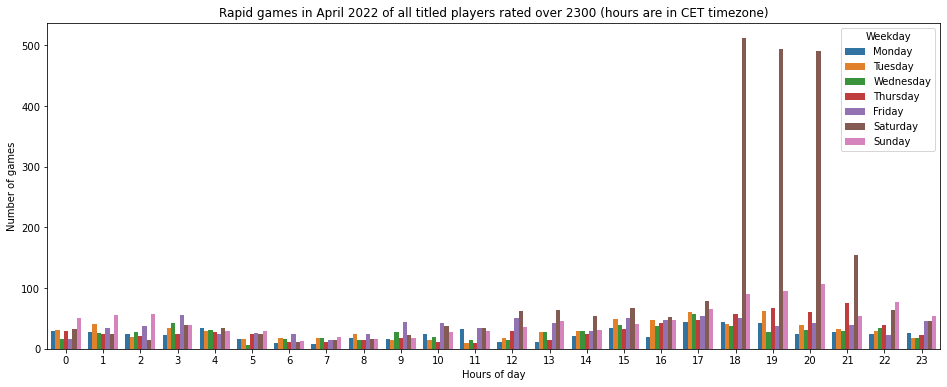

In [537]:
plt.figure(figsize=(16, 6))
sns.barplot(data=rapid_hour_weekday,x='Hours of day',y='Number of games',hue='Weekday',hue_order=weekdays)
plt.title('Rapid games in April 2022 of all titled players rated over 2300 (hours are in CET timezone)')
#plt.savefig('Hours_Weekday_rapid.jpg',dpi=300)

In [517]:
blitz_hour = blitz_times[['hour']].value_counts()
blitz_hour = blitz_hour.reset_index()
blitz_hour.columns=['Hours of day','Number of games']

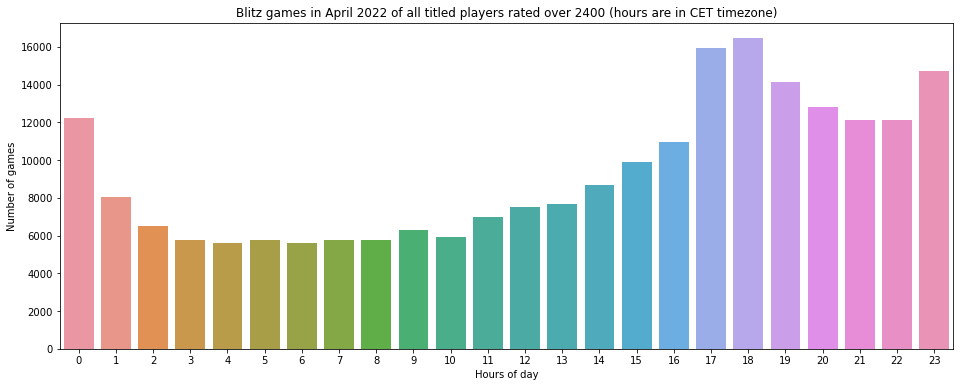

In [538]:
plt.figure(figsize=(16, 6))
g=sns.barplot(data=blitz_hour,x='Hours of day',y='Number of games')
plt.title('Blitz games in April 2022 of all titled players rated over 2400 (hours are in CET timezone)')
#plt.savefig('Hours_blitz.jpg',dpi=300)

In [523]:
blitz_weekday = blitz_times[['weekday']].value_counts()
blitz_weekday = blitz_weekday.reset_index()
blitz_weekday.columns=['Weekday','Number of games']
weekday_word(blitz_weekday,'Weekday')

,Weekday,Number of games
0,Tuesday,40062
1,Wednesday,34500
2,Friday,32722
3,Saturday,32648
4,Sunday,28420
5,Monday,27532
6,Thursday,27390


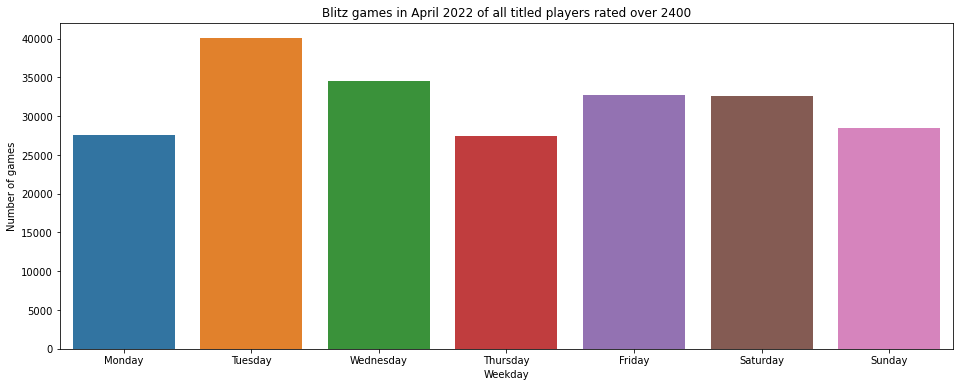

In [539]:
plt.figure(figsize=(16, 6))
sns.barplot(data=blitz_weekday,x='Weekday',y='Number of games',order=weekdays)
plt.title('Blitz games in April 2022 of all titled players rated over 2400')
#plt.savefig('Weekday_blitz.jpg',dpi=300)

In [527]:
blitz_hour_weekday = blitz_times[['weekday','hour']].value_counts()
blitz_hour_weekday = blitz_hour_weekday.reset_index()
blitz_hour_weekday.columns = ['Weekday','Hours of day','Number of games']
weekday_word(blitz_hour_weekday,'Weekday')

,Weekday,Hours of day,Number of games
0,Tuesday,17,5965
1,Tuesday,18,5306
2,Tuesday,23,4893
3,Wednesday,0,3928
4,Wednesday,19,3046
...,...,...,...
163,Saturday,4,701
164,Friday,4,695
165,Monday,8,694
166,Monday,7,665


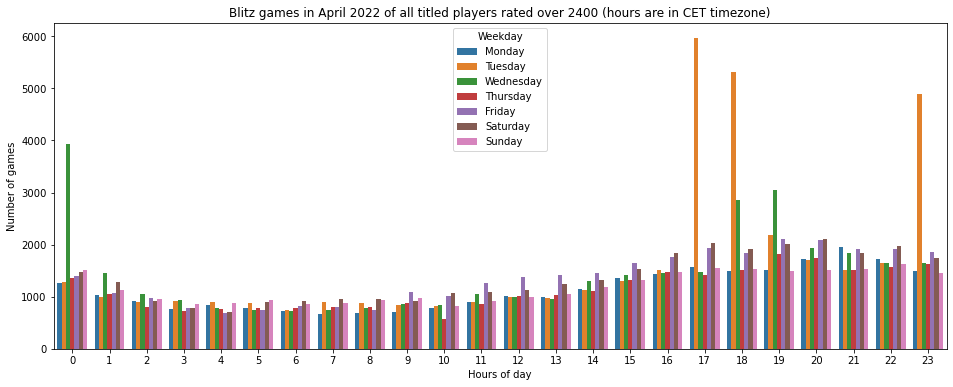

In [540]:
plt.figure(figsize=(16, 6))
sns.barplot(data=blitz_hour_weekday,x='Hours of day',y='Number of games',hue='Weekday',hue_order=weekdays)
plt.title('Blitz games in April 2022 of all titled players rated over 2400 (hours are in CET timezone)')
#plt.savefig('Hours_Weekday_blitz.jpg',dpi=300)